# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
# Imports of all used packages and libraries
import copy
import re
import os
import sys
import string
import glob
import ast
from collections import Counter
from collections import defaultdict
import warnings

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import git
# Getting the path of the root directory so that we can import repo specific functions
git_repo_object = git.Repo('.', search_parent_directories=True)
git_repo_directory = git_repo_object.working_tree_dir

In [4]:
# Setting path so that we can import functions
sys.path.append(os.path.join(git_repo_directory, "src"))

In [5]:
os.path.join(git_repo_directory, "src")


'/nancy/projects/social_dominance_active_inference/src'

In [6]:
from elorating import calculation
from elorating import dataframe

In [7]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

## Inputs & Data

Explanation of each input and where it comes from.

In [8]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [9]:
"elo_rating_spreadsheet_output_directory".upper()

'ELO_RATING_SPREADSHEET_OUTPUT_DIRECTORY'

In [10]:
PROTOCOL_NAME = "reward_competition"
PREFIX_NAME = "rc"
COHORT_NAME = "pilot_3"
RAW_DATA_FILE_PATH = "../../data/pilot_3/pilot_3_reward_competition.xlsx"
INPUTTED_SHEET_NAME = 'Master List'
ALL_HEADER_ROW = 0
SCORING_DF = pd.read_excel(RAW_DATA_FILE_PATH, sheet_name=INPUTTED_SHEET_NAME, header=ALL_HEADER_ROW)
CAGE_TO_STRAIN = {"1": "C57", "2": "C57", "3": "C57", "4": "CD1", "5": "CD1", "6": "CD1"}

In [11]:
ELO_RATING_SPREADSHEET_OUTPUT_DIRECTORY = os.path.join(OUTPUT_DIR, "elo_rating_spread_sheets")

In [12]:
os.makedirs(ELO_RATING_SPREADSHEET_OUTPUT_DIRECTORY, exist_ok=True)

In [13]:
SCORING_DF.head()

,Date,Cage,Box,Match,Scorer,Trial 1 Winner,Trial 2 Winner,Trial 3 Winner,Trial 4 Winner,Trial 5 Winner,...,Trial 13 Winner,Trial 14 Winner,Trial 15 Winner,Trial 16 Winner,Trial 17 Winner,Trial 18 Winner,Trial 19 Winner,Mouse 1 Wins,Mouse 2 Wins,Ties
0,2022-10-03,1,1,1.1 vs 1.2,Jocelyn,1.1,1.2,1.2,1.1,tie,...,1.1,tie,1.2,1.2,1.2,1.2,1.2,6,9,4
1,2022-10-03,1,2,1.3 vs 1.4,Jocelyn,1.3,1.4,1.3,1.4,1.4,...,1.3,tie,1.4,1.3,1.3,1.4,tie,8,8,3
2,2022-10-03,2,3,2.1 vs 2.2,Jocelyn,2.2,2.1,2.1,2.1,2.1,...,2.2,2.2,2.1,2.2,2.1,2.1,2.2,13,5,1
3,2022-10-03,2,4,2.3 vs 2.4,Jocelyn,2.4,2.4,2.4,2.3,2.4,...,2.3,2.3,2.4,2.4,2.4,2.4,2.3,6,13,0
4,2022-10-03,3,1,3.1 vs 3.2,Meghan,3.2,3.1,3.1,3.2,3.2,...,3.1,3.1,3.1,3.1,3.1,3.1,3.1,14,5,0


## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [14]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names


- Renaming all the columns to the lower case and space removed version

In [15]:
column_name_to_standarized = defaultdict(dict)

for col in SCORING_DF:
    # Making the column name lower case and removing the spaces
    column_name_to_standarized[col] = "_".join(str(col).lower().strip().split(" "))
column_name_to_standarized = column_name_to_standarized

In [16]:
SCORING_DF = SCORING_DF.rename(columns=column_name_to_standarized)

In [17]:
SCORING_DF = SCORING_DF.drop([col for col in SCORING_DF.columns if "wins" in col or "ties" in col], axis=1, errors="ignore")

In [18]:
SCORING_DF = SCORING_DF.dropna(subset=["trial_1_winner"])

In [19]:
SCORING_DF.head()

,date,cage,box,match,scorer,trial_1_winner,trial_2_winner,trial_3_winner,trial_4_winner,trial_5_winner,...,trial_10_winner,trial_11_winner,trial_12_winner,trial_13_winner,trial_14_winner,trial_15_winner,trial_16_winner,trial_17_winner,trial_18_winner,trial_19_winner
0,2022-10-03,1,1,1.1 vs 1.2,Jocelyn,1.1,1.2,1.2,1.1,tie,...,1.2,tie,1.2,1.1,tie,1.2,1.2,1.2,1.2,1.2
1,2022-10-03,1,2,1.3 vs 1.4,Jocelyn,1.3,1.4,1.3,1.4,1.4,...,1.3,1.4,1.4,1.3,tie,1.4,1.3,1.3,1.4,tie
2,2022-10-03,2,3,2.1 vs 2.2,Jocelyn,2.2,2.1,2.1,2.1,2.1,...,2.1,2.1,2.1,2.2,2.2,2.1,2.2,2.1,2.1,2.2
3,2022-10-03,2,4,2.3 vs 2.4,Jocelyn,2.4,2.4,2.4,2.3,2.4,...,2.4,2.4,2.4,2.3,2.3,2.4,2.4,2.4,2.4,2.3
4,2022-10-03,3,1,3.1 vs 3.2,Meghan,3.2,3.1,3.1,3.2,3.2,...,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1


## Add IDs of both animals and strain as a column

In [20]:
SCORING_DF["animal_ids"] = SCORING_DF["match"].apply(lambda x: tuple(sorted([all_ids.strip() for all_ids in re.findall(r"[-+]?(?:\d*\.\d+|\d+)", x)])))

In [21]:
SCORING_DF["strain"] = SCORING_DF["cage"].astype(str).map(CAGE_TO_STRAIN)

In [22]:
SCORING_DF.head()

,date,cage,box,match,scorer,trial_1_winner,trial_2_winner,trial_3_winner,trial_4_winner,trial_5_winner,...,trial_12_winner,trial_13_winner,trial_14_winner,trial_15_winner,trial_16_winner,trial_17_winner,trial_18_winner,trial_19_winner,animal_ids,strain
0,2022-10-03,1,1,1.1 vs 1.2,Jocelyn,1.1,1.2,1.2,1.1,tie,...,1.2,1.1,tie,1.2,1.2,1.2,1.2,1.2,"(1.1, 1.2)",C57
1,2022-10-03,1,2,1.3 vs 1.4,Jocelyn,1.3,1.4,1.3,1.4,1.4,...,1.4,1.3,tie,1.4,1.3,1.3,1.4,tie,"(1.3, 1.4)",C57
2,2022-10-03,2,3,2.1 vs 2.2,Jocelyn,2.2,2.1,2.1,2.1,2.1,...,2.1,2.2,2.2,2.1,2.2,2.1,2.1,2.2,"(2.1, 2.2)",C57
3,2022-10-03,2,4,2.3 vs 2.4,Jocelyn,2.4,2.4,2.4,2.3,2.4,...,2.4,2.3,2.3,2.4,2.4,2.4,2.4,2.3,"(2.3, 2.4)",C57
4,2022-10-03,3,1,3.1 vs 3.2,Meghan,3.2,3.1,3.1,3.2,3.2,...,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1,"(3.1, 3.2)",C57


- Saving the processed spreadsheet to a file

In [23]:
all_cages = "_".join([str(cage) for cage in sorted(SCORING_DF["cage"].unique())])

In [24]:
all_cages

'1_2_3_4_5_6'

In [25]:
earliest_date = SCORING_DF["date"].min()
latest_date = SCORING_DF["date"].max()

In [26]:
earliest_date = str(earliest_date.date()).replace("-", "")

In [27]:
latest_date = str(latest_date.date()).replace("-", "")

In [28]:
earliest_date

'20221003'

In [29]:
latest_date

'20221004'

In [30]:
file_name = "{}_trial_as_columns_cages_{}_date_{}_{}.csv".format(PROTOCOL_NAME, all_cages, earliest_date, latest_date)

SCORING_DF.to_csv(os.path.join(ELO_RATING_SPREADSHEET_OUTPUT_DIRECTORY, file_name))

In [31]:
SCORING_DF = SCORING_DF.drop(columns=["sheet_name", "scorer"], errors="ignore")

## Melt 

In [32]:
SCORING_DF["index"] = SCORING_DF.index
SCORING_DF = SCORING_DF.reset_index(drop=True)

In [33]:
SCORING_DF.head()

,date,cage,box,match,trial_1_winner,trial_2_winner,trial_3_winner,trial_4_winner,trial_5_winner,trial_6_winner,...,trial_13_winner,trial_14_winner,trial_15_winner,trial_16_winner,trial_17_winner,trial_18_winner,trial_19_winner,animal_ids,strain,index
0,2022-10-03,1,1,1.1 vs 1.2,1.1,1.2,1.2,1.1,tie,1.1,...,1.1,tie,1.2,1.2,1.2,1.2,1.2,"(1.1, 1.2)",C57,0
1,2022-10-03,1,2,1.3 vs 1.4,1.3,1.4,1.3,1.4,1.4,1.3,...,1.3,tie,1.4,1.3,1.3,1.4,tie,"(1.3, 1.4)",C57,1
2,2022-10-03,2,3,2.1 vs 2.2,2.2,2.1,2.1,2.1,2.1,2.1,...,2.2,2.2,2.1,2.2,2.1,2.1,2.2,"(2.1, 2.2)",C57,2
3,2022-10-03,2,4,2.3 vs 2.4,2.4,2.4,2.4,2.3,2.4,2.3,...,2.3,2.3,2.4,2.4,2.4,2.4,2.3,"(2.3, 2.4)",C57,3
4,2022-10-03,3,1,3.1 vs 3.2,3.2,3.1,3.1,3.2,3.2,3.1,...,3.1,3.1,3.1,3.1,3.1,3.1,3.1,"(3.1, 3.2)",C57,4


In [34]:
melted_scoring_df = SCORING_DF.melt(id_vars=["index", "date", "cage", "box", "match", "animal_ids"], 
        var_name="trial", 
        value_name="winner")

In [35]:
melted_scoring_df.head()

,index,date,cage,box,match,animal_ids,trial,winner
0,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_1_winner,1.1
1,1,2022-10-03,1,2,1.3 vs 1.4,"(1.3, 1.4)",trial_1_winner,1.3
2,2,2022-10-03,2,3,2.1 vs 2.2,"(2.1, 2.2)",trial_1_winner,2.2
3,3,2022-10-03,2,4,2.3 vs 2.4,"(2.3, 2.4)",trial_1_winner,2.4
4,4,2022-10-03,3,1,3.1 vs 3.2,"(3.1, 3.2)",trial_1_winner,3.2


In [36]:
melted_scoring_df.tail()

,index,date,cage,box,match,animal_ids,trial,winner
1435,67,2022-10-04,3,4,3.1vs3.2,"(3.1, 3.2)",strain,C57
1436,68,2022-10-04,2,1,2.3vs2.4,"(2.3, 2.4)",strain,C57
1437,69,2022-10-04,2,2,2.1vs2.2,"(2.1, 2.2)",strain,C57
1438,70,2022-10-04,1,3,1.3vs1.4,"(1.3, 1.4)",strain,C57
1439,71,2022-10-04,1,4,1.1vs1.2,"(1.1, 1.2)",strain,C57


- Dropping all rows that don't contain Winner

In [37]:
melted_scoring_df = melted_scoring_df.dropna(subset="winner")

In [38]:
melted_scoring_df["winner"].unique()

array([1.1, 1.3, 2.2, 2.4, 3.2, 3.3, 4.1, 4.4, 5.2, 5.4, 6.2, 6.3, 2.1,
       1.2, 3.4, 3.1, 6.4, 6.1, 5.3, 1.4, 4.2, 5.1, 'tie', 4.3, 2.3,
       'tie ', 'C57', 'CD1'], dtype=object)

In [39]:
melted_scoring_df["keep_row"] = melted_scoring_df["winner"].apply(lambda x: True if "tie" in str(x).lower() or re.match(r'^-?\d+(?:\.\d+)$', str(x)) else False)

In [40]:
melted_scoring_df = melted_scoring_df[melted_scoring_df["keep_row"]]

In [41]:
melted_scoring_df["winner"].unique()

array([1.1, 1.3, 2.2, 2.4, 3.2, 3.3, 4.1, 4.4, 5.2, 5.4, 6.2, 6.3, 2.1,
       1.2, 3.4, 3.1, 6.4, 6.1, 5.3, 1.4, 4.2, 5.1, 'tie', 4.3, 2.3,
       'tie '], dtype=object)

- Making all the ids into string

In [42]:
melted_scoring_df["winner"] = melted_scoring_df["winner"].astype(str)
melted_scoring_df["winner"] = melted_scoring_df["winner"].apply(lambda x: x.lower().strip())

In [43]:
melted_scoring_df["animal_ids"].unique()

array([('1.1', '1.2'), ('1.3', '1.4'), ('2.1', '2.2'), ('2.3', '2.4'),
       ('3.1', '3.2'), ('3.3', '3.4'), ('4.1', '4.2'), ('4.3', '4.4'),
       ('5.1', '5.2'), ('5.3', '5.4'), ('6.1', '6.2'), ('6.3', '6.4'),
       ('2.2', '2.4'), ('2.1', '2.3'), ('1.2', '1.4'), ('1.1', '1.3'),
       ('4.2', '4.4'), ('4.1', '4.3'), ('3.2', '3.4'), ('3.1', '3.3'),
       ('6.2', '6.4'), ('6.1', '6.3'), ('5.2', '5.4'), ('5.1', '5.3'),
       ('1.2', '1.3'), ('1.1', '1.4'), ('2.2', '2.3'), ('2.1', '2.4'),
       ('3.2', '3.3'), ('3.1', '3.4'), ('4.2', '4.3'), ('4.1', '4.4'),
       ('5.2', '5.3'), ('5.1', '5.4'), ('6.2', '6.3'), ('6.1', '6.4')],
      dtype=object)

- Making a different column for ties

In [44]:
melted_scoring_df["match_is_tie"] = melted_scoring_df["winner"].apply(lambda x: True if "tie" in x.lower().strip() else False)

- Replacing tie with the first animal id for elo score plotting

In [45]:
melted_scoring_df["winner"] = melted_scoring_df.apply(lambda x: x["animal_ids"][0] if x["match_is_tie"] else x["winner"], axis=1)

In [46]:
melted_scoring_df[melted_scoring_df["match_is_tie"]]

,index,date,cage,box,match,animal_ids,trial,winner,keep_row,match_is_tie
62,62,2022-10-04,5,3,5.3vs5.4,"(5.3, 5.4)",trial_1_winner,5.3,True,True
90,18,2022-10-03,3,3,3.2 vs 3.4,"(3.2, 3.4)",trial_2_winner,3.2,True,True
99,27,2022-10-03,2,4,2.1 vs 2.4,"(2.1, 2.4)",trial_2_winner,2.1,True,True
105,33,2022-10-03,5,2,5.1 vs 5.4,"(5.1, 5.4)",trial_2_winner,5.1,True,True
120,48,2022-10-04,5,1,5.1vs5.3,"(5.1, 5.3)",trial_2_winner,5.1,True,True
...,...,...,...,...,...,...,...,...,...,...
1297,1,2022-10-03,1,2,1.3 vs 1.4,"(1.3, 1.4)",trial_19_winner,1.3,True,True
1311,15,2022-10-03,1,4,1.1 vs 1.3,"(1.1, 1.3)",trial_19_winner,1.1,True,True
1349,53,2022-10-04,3,2,3.2vs3.4,"(3.2, 3.4)",trial_19_winner,3.2,True,True
1354,58,2022-10-04,2,3,2.1vs2.3,"(2.1, 2.3)",trial_19_winner,2.1,True,True


- Dropping all rows that don't have trial in the name for the trial section

In [47]:
melted_scoring_df = melted_scoring_df[melted_scoring_df["trial"].str.contains('trial')]

- Getting the number of the trial so that we can order by number(instead of string, which would make 11 come before 2)

In [48]:
melted_scoring_df["trial_number"] = melted_scoring_df["trial"].apply(lambda x: int(x.lower().strip("trial").strip("winner").strip("_")))

In [49]:
melted_scoring_df = melted_scoring_df.sort_values(["index", "trial_number"]).reset_index(drop=True)

In [50]:
melted_scoring_df.head()

,index,date,cage,box,match,animal_ids,trial,winner,keep_row,match_is_tie,trial_number
0,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1
1,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2
2,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_3_winner,1.2,True,False,3
3,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_4_winner,1.1,True,False,4
4,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_5_winner,1.1,True,True,5


In [51]:
melted_scoring_df.head(n=100)

,index,date,cage,box,match,animal_ids,trial,winner,keep_row,match_is_tie,trial_number
0,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1
1,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2
2,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_3_winner,1.2,True,False,3
3,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_4_winner,1.1,True,False,4
4,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_5_winner,1.1,True,True,5
...,...,...,...,...,...,...,...,...,...,...,...
95,5,2022-10-03,3,2,3.3 vs 3.4,"(3.3, 3.4)",trial_1_winner,3.3,True,False,1
96,5,2022-10-03,3,2,3.3 vs 3.4,"(3.3, 3.4)",trial_2_winner,3.4,True,False,2
97,5,2022-10-03,3,2,3.3 vs 3.4,"(3.3, 3.4)",trial_3_winner,3.4,True,False,3
98,5,2022-10-03,3,2,3.3 vs 3.4,"(3.3, 3.4)",trial_4_winner,3.3,True,True,4


In [52]:
melted_scoring_df["trial_number"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

## Add a column for the loser ID

In [53]:
melted_scoring_df.columns

Index(['index', 'date', 'cage', 'box', 'match', 'animal_ids', 'trial',
       'winner', 'keep_row', 'match_is_tie', 'trial_number'],
      dtype='object')

In [54]:
melted_scoring_df.head()

,index,date,cage,box,match,animal_ids,trial,winner,keep_row,match_is_tie,trial_number
0,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1
1,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2
2,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_3_winner,1.2,True,False,3
3,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_4_winner,1.1,True,False,4
4,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_5_winner,1.1,True,True,5


In [55]:
melted_scoring_df["loser"] = melted_scoring_df.apply(lambda x: (list(set(x["animal_ids"]) - set([x["winner"]]))[0]), axis=1)

In [56]:
melted_scoring_df["loser"].unique()

array(['1.2', '1.1', '1.4', '1.3', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.4', '3.3', '4.2', '4.1', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.4', '6.3'], dtype=object)

In [57]:
melted_scoring_df.head(n=5)

,index,date,cage,box,match,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser
0,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2
1,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1
2,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_3_winner,1.2,True,False,3,1.1
3,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_4_winner,1.1,True,False,4,1.2
4,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_5_winner,1.1,True,True,5,1.2


In [58]:
melted_scoring_df.tail(n=5)

,index,date,cage,box,match,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser
1363,71,2022-10-04,1,4,1.1vs1.2,"(1.1, 1.2)",trial_15_winner,1.1,True,False,15,1.2
1364,71,2022-10-04,1,4,1.1vs1.2,"(1.1, 1.2)",trial_16_winner,1.1,True,False,16,1.2
1365,71,2022-10-04,1,4,1.1vs1.2,"(1.1, 1.2)",trial_17_winner,1.1,True,False,17,1.2
1366,71,2022-10-04,1,4,1.1vs1.2,"(1.1, 1.2)",trial_18_winner,1.1,True,False,18,1.2
1367,71,2022-10-04,1,4,1.1vs1.2,"(1.1, 1.2)",trial_19_winner,1.1,True,False,19,1.2


## Adding the session number

- We are adding the session number to all the trials. The session number is counting the number of recording sessions that have happened up until that trial. Usually, each session in the spreadsheet is divided up by a session's first row having the date filled in. So we will label a new session when a date is filled in.

# Getting the Session number differences

- Getting the indexes of where each new session starts. So that we can add the session number to each row.

In [59]:
melted_scoring_df["session_number_difference"] = melted_scoring_df["date"].astype('category').cat.codes.diff()


## Calculating Elo rating

- Example calculation

In [60]:
calculation.calculate_elo_rating(subject_elo_rating=1000, agent_elo_rating=2000, score=1)

1019.9

In [61]:
calculation.update_elo_rating(winner_id="A", loser_id="B")

defaultdict(<function elorating.calculation.update_elo_rating.<locals>.<lambda>()>,
            {'A': 1010.0, 'B': 990.0})

## Get the Elo rating for all the events

- Going through each row or interaction and calculating the new Elo rating for the winner and loser. This will create a new dataframe based off of the processed behavioral recording dataframe

In [62]:
cage_to_elo_rating_dict = defaultdict(dict)
for cage in melted_scoring_df["cage"].unique():
    cage_df = melted_scoring_df[melted_scoring_df["cage"] == cage]
    cage_to_elo_rating_dict[cage] = calculation.iterate_elo_rating_calculation_for_dataframe(dataframe=cage_df, winner_id_column="winner", loser_id_column="loser", additional_columns=melted_scoring_df.columns, tie_column="match_is_tie")

In [63]:
cage_to_elo_rating_dict.keys()

dict_keys([1, 2, 3, 4, 5, 6])

In [64]:
cage_to_elo_rating_dict[list(cage_to_elo_rating_dict.keys())[0]][0]

{'total_match_number': 1,
 'subject_id': '1.1',
 'agent_id': '1.2',
 'original_elo_rating': 1000,
 'updated_elo_rating': 1010.0,
 'win_draw_loss': 1,
 'subject_ranking': 1,
 'agent_ranking': 2,
 'pairing_index': 0,
 'index': 0,
 'date': Timestamp('2022-10-03 00:00:00'),
 'cage': 1,
 'box': 1,
 'match': '1.1 vs 1.2',
 'animal_ids': ('1.1', '1.2'),
 'trial': 'trial_1_winner',
 'winner': '1.1',
 'keep_row': True,
 'match_is_tie': False,
 'trial_number': 1,
 'loser': '1.2',
 'session_number_difference': nan}

- Turning the dictionary into a dataframe

In [65]:
all_cage_elo_rating_list = []
for key in cage_to_elo_rating_dict.keys():
    cage_elo_rating_df = pd.DataFrame.from_dict(cage_to_elo_rating_dict[key], orient="index")
    cage_elo_rating_df.insert(0, 'total_trial_number', range(0, 0 + len(cage_elo_rating_df)))
    all_cage_elo_rating_list.append(cage_elo_rating_df)


In [66]:
all_cage_elo_rating_df = pd.concat(all_cage_elo_rating_list)

In [67]:
all_cage_elo_rating_df.head()

,total_trial_number,total_match_number,subject_id,agent_id,original_elo_rating,updated_elo_rating,win_draw_loss,subject_ranking,agent_ranking,pairing_index,...,box,match,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser,session_number_difference
0,0,1,1.1,1.2,1000.0,1010.0,1.0,1,2,0,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2,NaN
1,1,1,1.2,1.1,1000.0,990.0,0.0,2,1,1,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2,NaN
2,2,2,1.2,1.1,990.0,1000.6,1.0,1,2,0,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1,0.0
3,3,2,1.1,1.2,1010.0,999.4,0.0,2,1,1,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1,0.0
4,4,3,1.2,1.1,1000.6,1010.6,1.0,1,2,0,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_3_winner,1.2,True,False,3,1.1,0.0


In [68]:
all_cage_elo_rating_df.tail()

,total_trial_number,total_match_number,subject_id,agent_id,original_elo_rating,updated_elo_rating,win_draw_loss,subject_ranking,agent_ranking,pairing_index,...,box,match,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser,session_number_difference
451,451,226,6.2,6.1,743.4,739.4,0.0,4,3,1,...,2,6.1vs6.2,"(6.1, 6.2)",trial_17_winner,6.1,True,False,17,6.2,0.0
452,452,227,6.1,6.2,986.9,990.8,1.0,3,4,0,...,2,6.1vs6.2,"(6.1, 6.2)",trial_18_winner,6.1,True,False,18,6.2,0.0
453,453,227,6.2,6.1,739.4,735.5,0.0,4,3,1,...,2,6.1vs6.2,"(6.1, 6.2)",trial_18_winner,6.1,True,False,18,6.2,0.0
454,454,228,6.2,6.1,735.5,751.8,1.0,4,3,0,...,2,6.1vs6.2,"(6.1, 6.2)",trial_19_winner,6.2,True,False,19,6.1,0.0
455,455,228,6.1,6.2,990.8,974.5,0.0,3,4,1,...,2,6.1vs6.2,"(6.1, 6.2)",trial_19_winner,6.2,True,False,19,6.1,0.0


In [69]:
all_cage_elo_rating_df[all_cage_elo_rating_df["match_is_tie"]]

,total_trial_number,total_match_number,subject_id,agent_id,original_elo_rating,updated_elo_rating,win_draw_loss,subject_ranking,agent_ranking,pairing_index,...,box,match,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser,session_number_difference
8,8,5,1.1,1.2,1000.0,1000.0,0.5,1,2,0,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_5_winner,1.1,True,True,5,1.2,0.0
9,9,5,1.2,1.1,1000.0,1000.0,0.5,2,1,1,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_5_winner,1.1,True,True,5,1.2,0.0
14,14,8,1.1,1.2,1019.4,1018.3,0.5,1,2,0,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_8_winner,1.1,True,True,8,1.2,0.0
15,15,8,1.2,1.1,980.6,981.7,0.5,2,1,1,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_8_winner,1.1,True,True,8,1.2,0.0
20,20,11,1.1,1.2,1015.7,1014.8,0.5,1,2,0,...,1,1.1 vs 1.2,"(1.1, 1.2)",trial_11_winner,1.1,True,True,11,1.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,130,6.4,6.1,1115.8,1110.7,0.5,2,3,1,...,1,6.1 vs 6.4,"(6.1, 6.4)",trial_16_winner,6.1,True,True,16,6.4,0.0
318,318,160,6.1,6.3,994.8,998.7,0.5,3,1,0,...,3,6.1vs6.3,"(6.1, 6.3)",trial_8_winner,6.1,True,True,8,6.3,0.0
319,319,160,6.3,6.1,1138.2,1134.3,0.5,1,3,1,...,3,6.1vs6.3,"(6.1, 6.3)",trial_8_winner,6.1,True,True,8,6.3,0.0
332,332,167,6.1,6.3,983.4,987.8,0.5,3,1,0,...,3,6.1vs6.3,"(6.1, 6.3)",trial_15_winner,6.1,True,True,15,6.3,0.0


In [70]:
if CAGE_TO_STRAIN:
    all_cage_elo_rating_df["strain"] = all_cage_elo_rating_df["cage"].astype(str).map(CAGE_TO_STRAIN)

- Adding the cohort

In [71]:
all_cage_elo_rating_df["experiment_type"] = PROTOCOL_NAME


In [72]:
all_cage_elo_rating_df.head()

,total_trial_number,total_match_number,subject_id,agent_id,original_elo_rating,updated_elo_rating,win_draw_loss,subject_ranking,agent_ranking,pairing_index,...,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser,session_number_difference,strain,experiment_type
0,0,1,1.1,1.2,1000.0,1010.0,1.0,1,2,0,...,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2,NaN,C57,reward_competition
1,1,1,1.2,1.1,1000.0,990.0,0.0,2,1,1,...,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2,NaN,C57,reward_competition
2,2,2,1.2,1.1,990.0,1000.6,1.0,1,2,0,...,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1,0.0,C57,reward_competition
3,3,2,1.1,1.2,1010.0,999.4,0.0,2,1,1,...,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1,0.0,C57,reward_competition
4,4,3,1.2,1.1,1000.6,1010.6,1.0,1,2,0,...,"(1.1, 1.2)",trial_3_winner,1.2,True,False,3,1.1,0.0,C57,reward_competition


In [73]:
all_cage_elo_rating_df.head()

,total_trial_number,total_match_number,subject_id,agent_id,original_elo_rating,updated_elo_rating,win_draw_loss,subject_ranking,agent_ranking,pairing_index,...,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser,session_number_difference,strain,experiment_type
0,0,1,1.1,1.2,1000.0,1010.0,1.0,1,2,0,...,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2,NaN,C57,reward_competition
1,1,1,1.2,1.1,1000.0,990.0,0.0,2,1,1,...,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2,NaN,C57,reward_competition
2,2,2,1.2,1.1,990.0,1000.6,1.0,1,2,0,...,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1,0.0,C57,reward_competition
3,3,2,1.1,1.2,1010.0,999.4,0.0,2,1,1,...,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1,0.0,C57,reward_competition
4,4,3,1.2,1.1,1000.6,1010.6,1.0,1,2,0,...,"(1.1, 1.2)",trial_3_winner,1.2,True,False,3,1.1,0.0,C57,reward_competition


## Saving the Elo Score Dataframes

- Adding the cage information for each cage

In [74]:
all_cage_elo_rating_df.head()

,total_trial_number,total_match_number,subject_id,agent_id,original_elo_rating,updated_elo_rating,win_draw_loss,subject_ranking,agent_ranking,pairing_index,...,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser,session_number_difference,strain,experiment_type
0,0,1,1.1,1.2,1000.0,1010.0,1.0,1,2,0,...,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2,NaN,C57,reward_competition
1,1,1,1.2,1.1,1000.0,990.0,0.0,2,1,1,...,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2,NaN,C57,reward_competition
2,2,2,1.2,1.1,990.0,1000.6,1.0,1,2,0,...,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1,0.0,C57,reward_competition
3,3,2,1.1,1.2,1010.0,999.4,0.0,2,1,1,...,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1,0.0,C57,reward_competition
4,4,3,1.2,1.1,1000.6,1010.6,1.0,1,2,0,...,"(1.1, 1.2)",trial_3_winner,1.2,True,False,3,1.1,0.0,C57,reward_competition


In [75]:
all_cage_elo_rating_df[all_cage_elo_rating_df["win_draw_loss"] == 0.5]

,total_trial_number,total_match_number,subject_id,agent_id,original_elo_rating,updated_elo_rating,win_draw_loss,subject_ranking,agent_ranking,pairing_index,...,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser,session_number_difference,strain,experiment_type
8,8,5,1.1,1.2,1000.0,1000.0,0.5,1,2,0,...,"(1.1, 1.2)",trial_5_winner,1.1,True,True,5,1.2,0.0,C57,reward_competition
9,9,5,1.2,1.1,1000.0,1000.0,0.5,2,1,1,...,"(1.1, 1.2)",trial_5_winner,1.1,True,True,5,1.2,0.0,C57,reward_competition
14,14,8,1.1,1.2,1019.4,1018.3,0.5,1,2,0,...,"(1.1, 1.2)",trial_8_winner,1.1,True,True,8,1.2,0.0,C57,reward_competition
15,15,8,1.2,1.1,980.6,981.7,0.5,2,1,1,...,"(1.1, 1.2)",trial_8_winner,1.1,True,True,8,1.2,0.0,C57,reward_competition
20,20,11,1.1,1.2,1015.7,1014.8,0.5,1,2,0,...,"(1.1, 1.2)",trial_11_winner,1.1,True,True,11,1.2,0.0,C57,reward_competition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,130,6.4,6.1,1115.8,1110.7,0.5,2,3,1,...,"(6.1, 6.4)",trial_16_winner,6.1,True,True,16,6.4,0.0,CD1,reward_competition
318,318,160,6.1,6.3,994.8,998.7,0.5,3,1,0,...,"(6.1, 6.3)",trial_8_winner,6.1,True,True,8,6.3,0.0,CD1,reward_competition
319,319,160,6.3,6.1,1138.2,1134.3,0.5,1,3,1,...,"(6.1, 6.3)",trial_8_winner,6.1,True,True,8,6.3,0.0,CD1,reward_competition
332,332,167,6.1,6.3,983.4,987.8,0.5,3,1,0,...,"(6.1, 6.3)",trial_15_winner,6.1,True,True,15,6.3,0.0,CD1,reward_competition


In [76]:
id_to_final_elo_rating_dict = defaultdict(dict)
for index, subject_id in enumerate(sorted(all_cage_elo_rating_df["subject_id"].unique())):
    per_subject_df = all_cage_elo_rating_df[all_cage_elo_rating_df["subject_id"] == subject_id]
    id_to_final_elo_rating_dict[index]["subject_id"] = subject_id

    id_to_final_elo_rating_dict[index]["final_elo_rating"] = per_subject_df.iloc[-1]["updated_elo_rating"]
    id_to_final_elo_rating_dict[index]["strain"] = per_subject_df.iloc[-1]["strain"]
    id_to_final_elo_rating_dict[index]["cage"] = per_subject_df.iloc[-1]["cage"]

    

In [77]:
id_to_final_elo_rating_dict

defaultdict(dict,
            {0: {'subject_id': '1.1',
              'final_elo_rating': 1163.2,
              'strain': 'C57',
              'cage': 1},
             1: {'subject_id': '1.2',
              'final_elo_rating': 959.9,
              'strain': 'C57',
              'cage': 1},
             2: {'subject_id': '1.3',
              'final_elo_rating': 1018.4,
              'strain': 'C57',
              'cage': 1},
             3: {'subject_id': '1.4',
              'final_elo_rating': 858.5,
              'strain': 'C57',
              'cage': 1},
             4: {'subject_id': '2.1',
              'final_elo_rating': 972.6,
              'strain': 'C57',
              'cage': 2},
             5: {'subject_id': '2.2',
              'final_elo_rating': 1110.4,
              'strain': 'C57',
              'cage': 2},
             6: {'subject_id': '2.3',
              'final_elo_rating': 1031.1,
              'strain': 'C57',
              'cage': 2},
             7: {'subject_

In [78]:
id_to_final_elo_rating_df = pd.DataFrame.from_dict(id_to_final_elo_rating_dict, orient="index")
# Adding protocol name
id_to_final_elo_rating_df["experiment_type"] = PROTOCOL_NAME
# Adding rank
id_to_final_elo_rating_df["rank"] = id_to_final_elo_rating_df.groupby("cage")["final_elo_rating"].rank("dense", ascending=False)
# Sorting by cage and then id
id_to_final_elo_rating_df = id_to_final_elo_rating_df.sort_values(by=['cage', "subject_id"], ascending=True).reset_index(drop=True)

In [79]:
id_to_final_elo_rating_df["rank"] = id_to_final_elo_rating_df.groupby("cage")["final_elo_rating"].rank("dense", ascending=False)

In [80]:
id_to_final_elo_rating_df = id_to_final_elo_rating_df.sort_values(by=['cage', "subject_id"], ascending=True).reset_index(drop=True)

In [81]:
id_to_final_elo_rating_df.head()

,subject_id,final_elo_rating,strain,cage,experiment_type,rank
0,1.1,1163.2,C57,1,reward_competition,1.0
1,1.2,959.9,C57,1,reward_competition,3.0
2,1.3,1018.4,C57,1,reward_competition,2.0
3,1.4,858.5,C57,1,reward_competition,4.0
4,2.1,972.6,C57,2,reward_competition,3.0


In [82]:
id_to_final_elo_rating_df.tail()

,subject_id,final_elo_rating,strain,cage,experiment_type,rank
19,5.4,963.0,CD1,5,reward_competition,3.0
20,6.1,974.5,CD1,6,reward_competition,3.0
21,6.2,751.8,CD1,6,reward_competition,4.0
22,6.3,1244.4,CD1,6,reward_competition,1.0
23,6.4,1029.3,CD1,6,reward_competition,2.0


- Getting the cage numbersm

In [83]:
all_cages

'1_2_3_4_5_6'

# Plotting the Elo Score by match number

In [84]:
plot_output_directory = "./proc/plots/reward_competition/cage_{}_date_{}_{}".format(all_cages, earliest_date, latest_date)

In [85]:
plot_output_directory

'./proc/plots/reward_competition/cage_1_2_3_4_5_6_date_20221003_20221004'

In [86]:
os.makedirs(plot_output_directory, exist_ok=True)

In [87]:
all_cage_elo_rating_df["subject_id"] = all_cage_elo_rating_df["subject_id"].astype(str)
all_cage_elo_rating_df["agent_id"] = all_cage_elo_rating_df["agent_id"].astype(str)

In [88]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

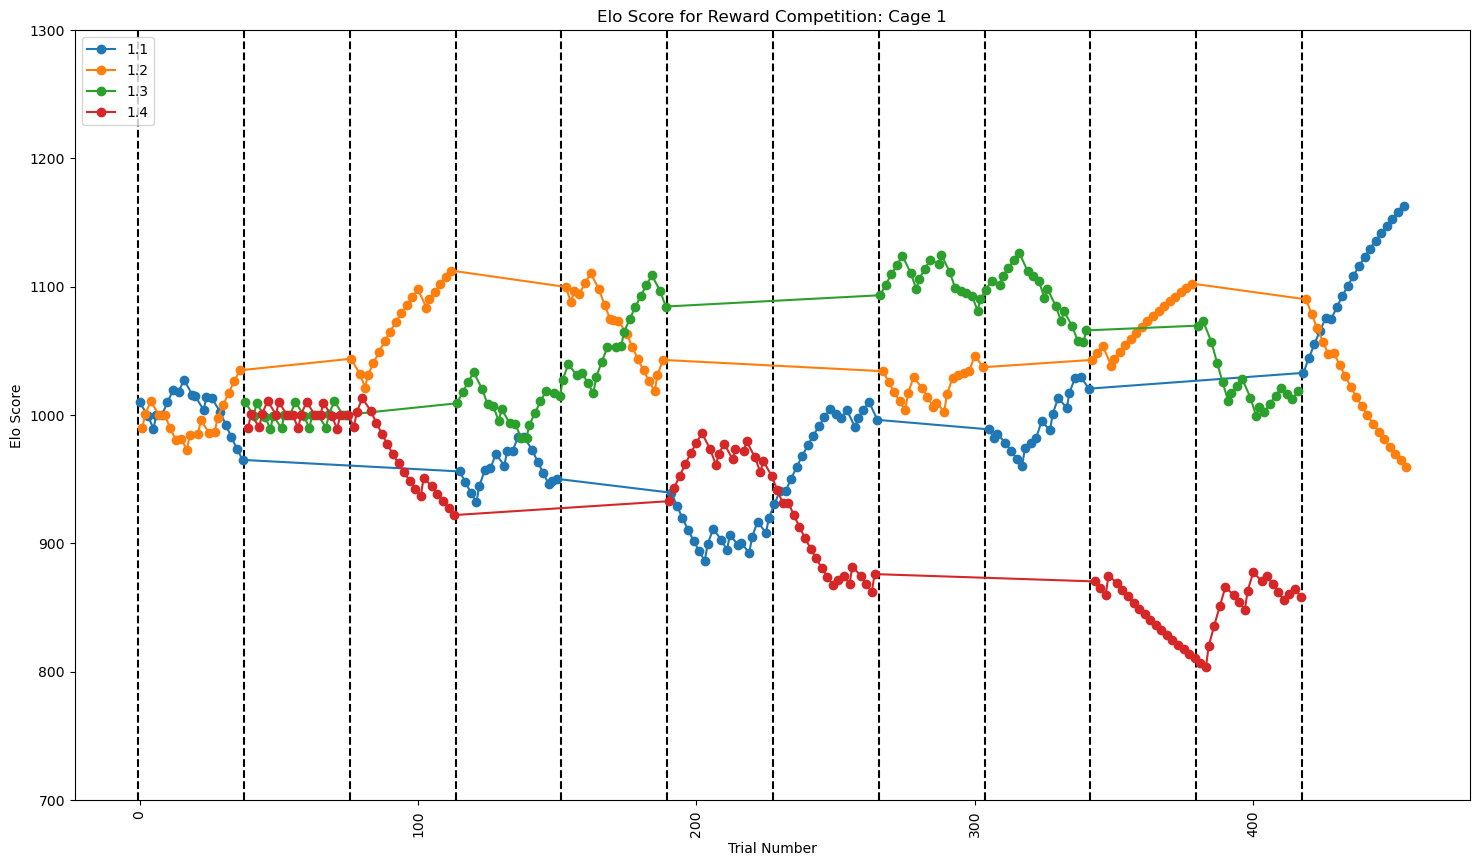

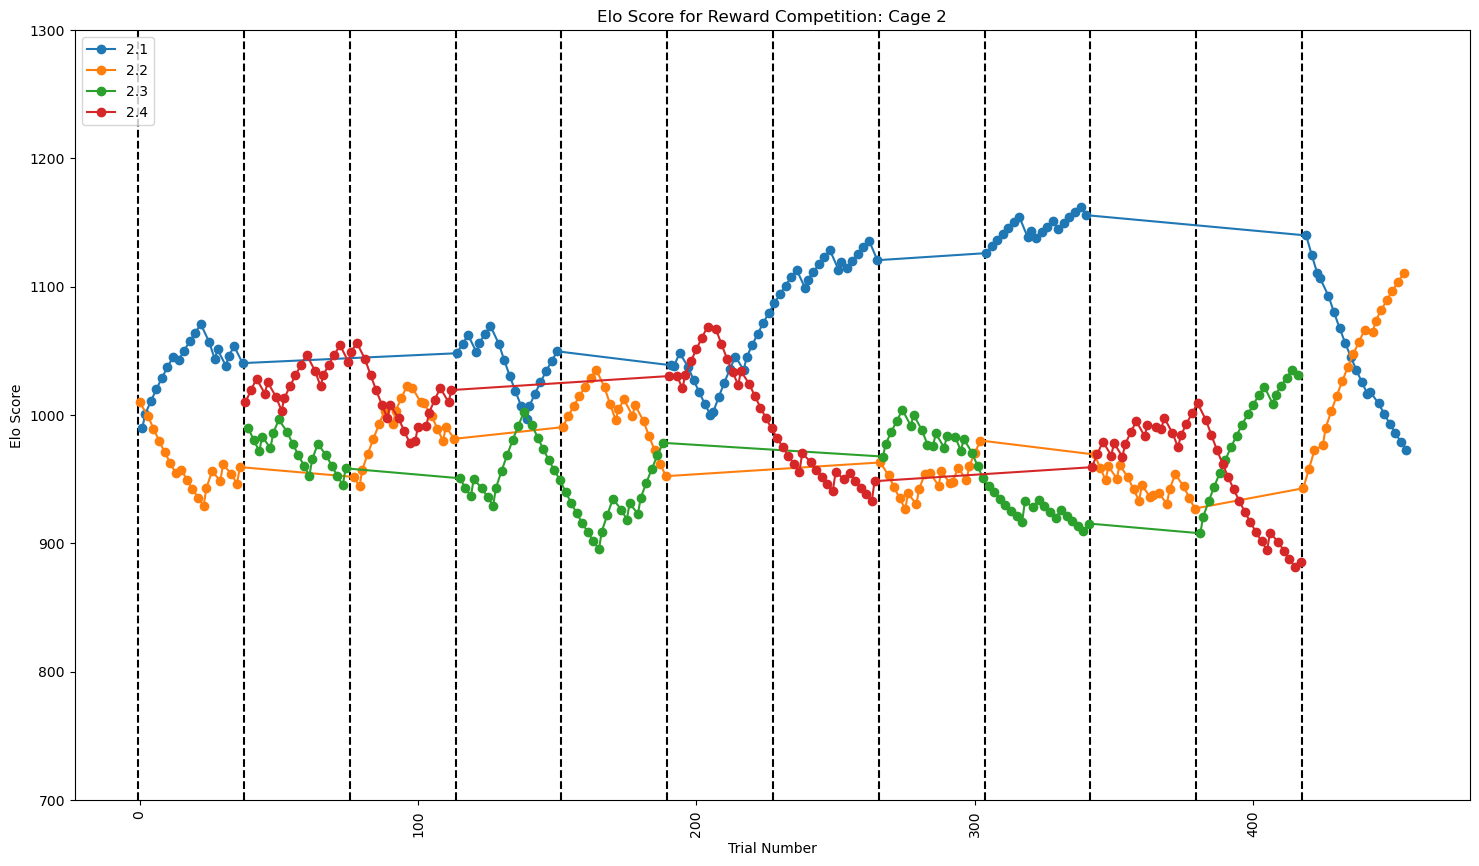

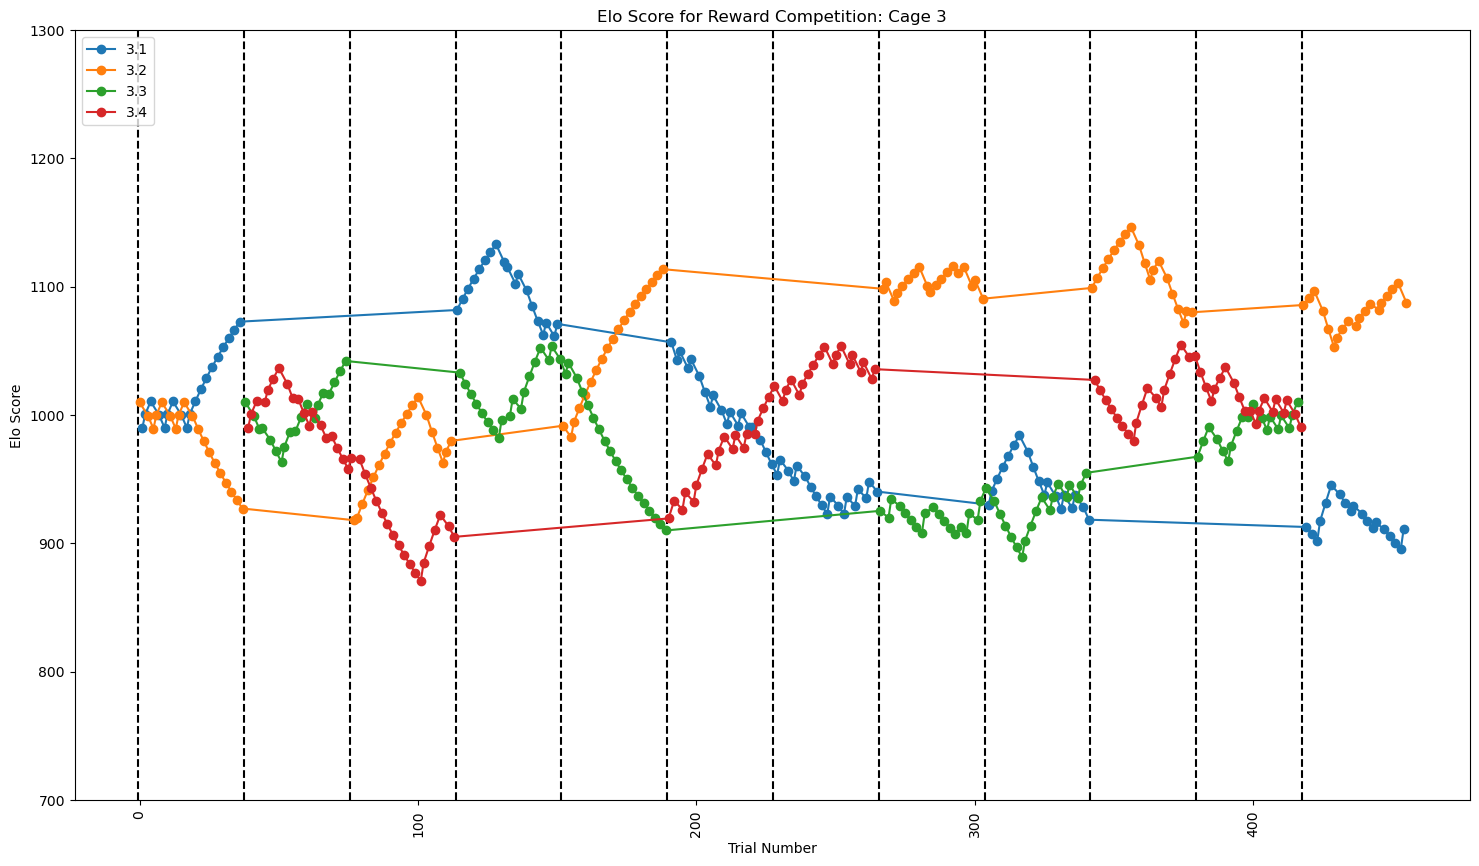

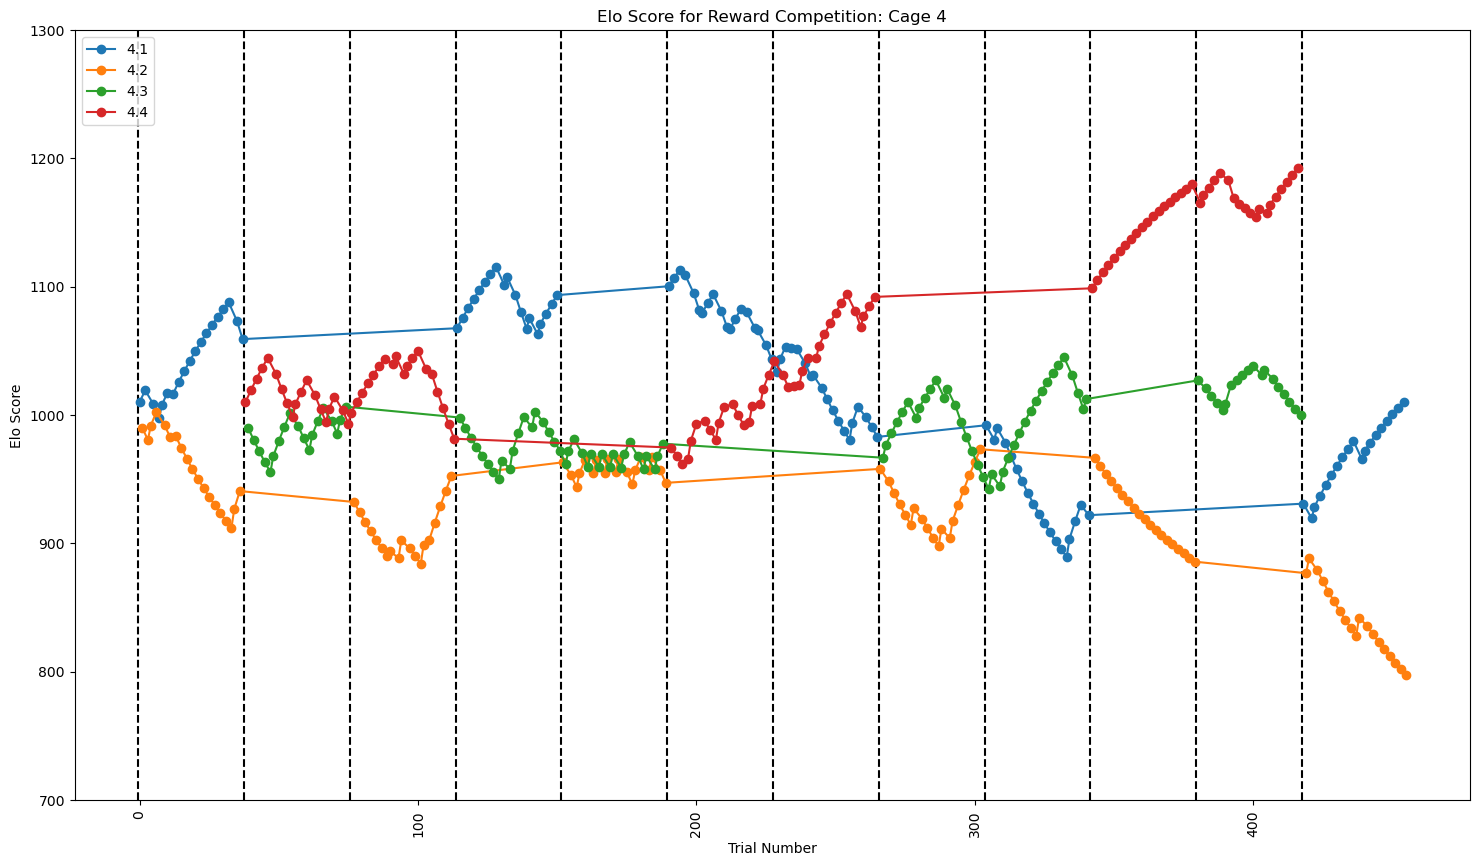

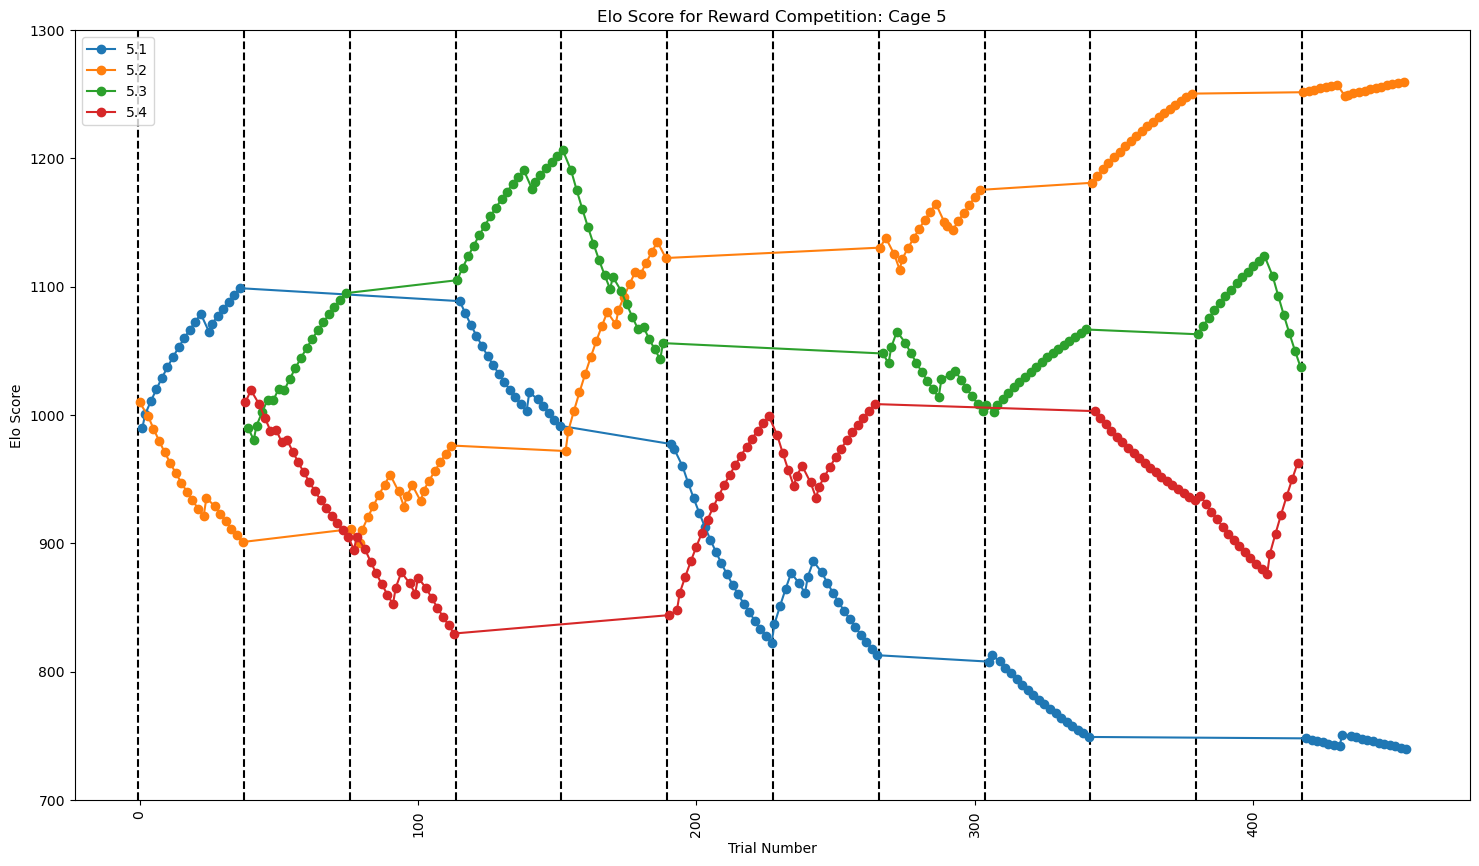

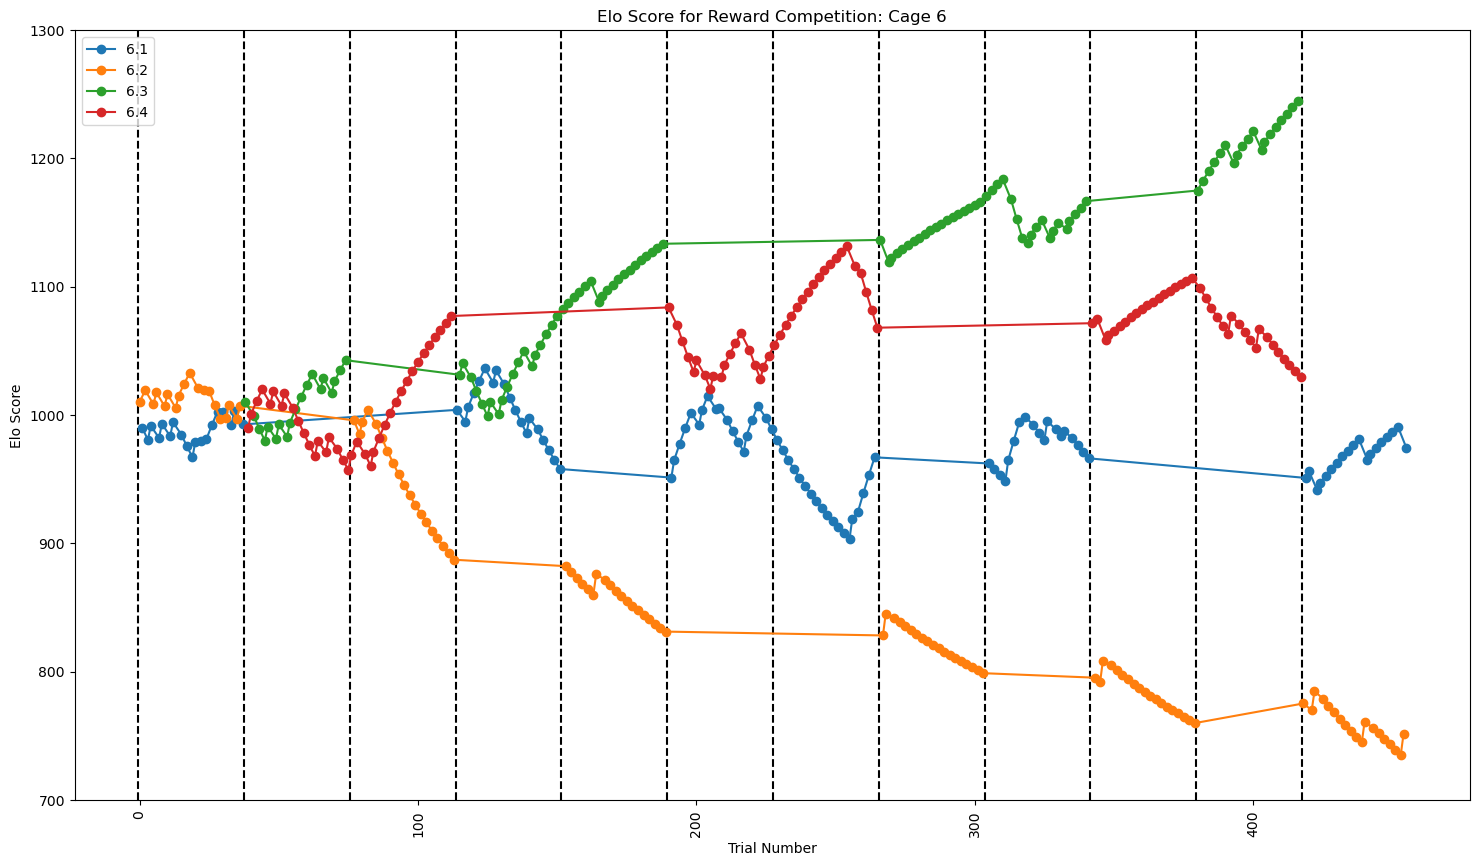

In [89]:
for cage in all_cage_elo_rating_df["cage"].unique():
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (18,10)
    per_cage_df = all_cage_elo_rating_df[all_cage_elo_rating_df["cage"] == cage]
       
    for index in per_cage_df["index"].unique():
        first_session_in_trial = per_cage_df[per_cage_df["index"] == index].iloc[0]["total_trial_number"]
        plt.vlines(x=[first_session_in_trial - 0.5], ymin=700, ymax=1300, colors='black', linestyle='dashed')

    
    
    # Drawing a line for each subject
    for subject in sorted(per_cage_df["subject_id"].unique()):
        # Getting all the rows with the current subject
        subject_df = per_cage_df[per_cage_df["subject_id"] == subject]
        # Making the dates into days after the first session by subtracting all the dates by the first date
        plt.plot(subject_df["total_trial_number"], subject_df["updated_elo_rating"], '-o', label=subject)
    
    # Labeling the X/Y Axis and the title
    ax.set_xlabel("Trial Number")
    ax.set_ylabel("Elo Score")
    ax.set_title("Elo Score for {}: Cage {}".format(string.capwords(" ".join(PROTOCOL_NAME.split("_"))), str(cage)))
    # To show the legend
    ax.legend(loc="upper left")
    plt.xticks(rotation=90)
    plt.ylim(700, 1300) 
    file_name = "{}_elo_rating_{}_date_{}_{}.png".format( PROTOCOL_NAME, cage, earliest_date, latest_date)
    plt.savefig(os.path.join(plot_output_directory, file_name))  
    
    plt.show()

# Saving the Dataframes

In [90]:
elo_rating_spreadsheet_output_directory = os.path.join(".", "proc", "elo_rating_spread_sheets")

In [91]:
elo_rating_spreadsheet_output_directory

'./proc/elo_rating_spread_sheets'

In [92]:
os.makedirs(elo_rating_spreadsheet_output_directory, exist_ok=True)

In [93]:
file_name_parts_separated = ["cages_{}".format(all_cages), PREFIX_NAME, earliest_date, latest_date]
file_name_parts_combined = "_".join([part for part in file_name_parts_separated if part])

file_name_full = "{}_elo-rating-history.csv".format(file_name_parts_combined)
print(file_name_full)
all_cage_elo_rating_df.to_csv(os.path.join(elo_rating_spreadsheet_output_directory, file_name_full))

cages_1_2_3_4_5_6_rc_20221003_20221004_elo-rating-history.csv


In [94]:
file_name_full = "{}_final-elo-rating.csv".format(file_name_parts_combined)
print(file_name_full)
id_to_final_elo_rating_df.to_csv(os.path.join(elo_rating_spreadsheet_output_directory, file_name_full))

cages_1_2_3_4_5_6_rc_20221003_20221004_final-elo-rating.csv


## Seeing which subject is the dominant or submissive

- Grouping all the rows with the same pair

In [95]:
melted_scoring_df = melted_scoring_df

In [96]:
melted_scoring_df.head()

,index,date,cage,box,match,animal_ids,trial,winner,keep_row,match_is_tie,trial_number,loser,session_number_difference
0,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_1_winner,1.1,True,False,1,1.2,NaN
1,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_2_winner,1.2,True,False,2,1.1,0.0
2,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_3_winner,1.2,True,False,3,1.1,0.0
3,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_4_winner,1.1,True,False,4,1.2,0.0
4,0,2022-10-03,1,1,1.1 vs 1.2,"(1.1, 1.2)",trial_5_winner,1.1,True,True,5,1.2,0.0


In [97]:
melted_scoring_df.columns

Index(['index', 'date', 'cage', 'box', 'match', 'animal_ids', 'trial',
       'winner', 'keep_row', 'match_is_tie', 'trial_number', 'loser',
       'session_number_difference'],
      dtype='object')

In [98]:
['date', 'cage', 'match', 'animal_ids', 'trial', 'winner', 'tie', 'loser']

['date', 'cage', 'match', 'animal_ids', 'trial', 'winner', 'tie', 'loser']

- Removing columns that would be unnecessary for the pairings

In [99]:
melted_scoring_df = melted_scoring_df[['date', 'cage', 'match', 'animal_ids', 'trial', 'winner', 'match_is_tie', 'loser']]
melted_scoring_df['processed_cage_number'] = melted_scoring_df['cage'].astype(int)

In [100]:
melted_scoring_df.head()

,date,cage,match,animal_ids,trial,winner,match_is_tie,loser,processed_cage_number
0,2022-10-03,1,1.1 vs 1.2,"(1.1, 1.2)",trial_1_winner,1.1,False,1.2,1
1,2022-10-03,1,1.1 vs 1.2,"(1.1, 1.2)",trial_2_winner,1.2,False,1.1,1
2,2022-10-03,1,1.1 vs 1.2,"(1.1, 1.2)",trial_3_winner,1.2,False,1.1,1
3,2022-10-03,1,1.1 vs 1.2,"(1.1, 1.2)",trial_4_winner,1.1,False,1.2,1
4,2022-10-03,1,1.1 vs 1.2,"(1.1, 1.2)",trial_5_winner,1.1,True,1.2,1


- Adding a tie to the list of winners and losers if it's a tie

In [101]:
melted_scoring_df["winner"] = melted_scoring_df.apply(lambda x: "tie" if x["match_is_tie"] else x["winner"], axis=1)
melted_scoring_df["loser"] = melted_scoring_df.apply(lambda x: "tie" if x["match_is_tie"] else x["loser"], axis=1)

In [102]:
melted_scoring_df[melted_scoring_df["match_is_tie"]].head()

,date,cage,match,animal_ids,trial,winner,match_is_tie,loser,processed_cage_number
4,2022-10-03,1,1.1 vs 1.2,"(1.1, 1.2)",trial_5_winner,tie,True,tie,1
7,2022-10-03,1,1.1 vs 1.2,"(1.1, 1.2)",trial_8_winner,tie,True,tie,1
10,2022-10-03,1,1.1 vs 1.2,"(1.1, 1.2)",trial_11_winner,tie,True,tie,1
13,2022-10-03,1,1.1 vs 1.2,"(1.1, 1.2)",trial_14_winner,tie,True,tie,1
27,2022-10-03,1,1.3 vs 1.4,"(1.3, 1.4)",trial_9_winner,tie,True,tie,1


- Making a list of all the wins and loses

In [103]:
all_wins_per_pair = melted_scoring_df.groupby(["animal_ids", "date"])['winner'].apply(list)
all_loses_per_pair = melted_scoring_df.groupby(["animal_ids", "date"])['loser'].apply(list)

In [104]:
all_competition_per_pair_df = pd.concat([all_wins_per_pair, all_loses_per_pair], axis=1).reset_index()

In [105]:
all_competition_per_pair_df = all_competition_per_pair_df.rename(columns={k: "rc_" + k for k in all_competition_per_pair_df.columns})

In [106]:
all_competition_per_pair_df

,rc_animal_ids,rc_date,rc_winner,rc_loser
0,"(1.1, 1.2)",2022-10-03,"[1.1, 1.2, 1.2, 1.1, tie, 1.1, 1.1, tie, 1.1, ...","[1.2, 1.1, 1.1, 1.2, tie, 1.2, 1.2, tie, 1.2, ..."
1,"(1.1, 1.2)",2022-10-04,"[1.1, 1.1, 1.1, 1.1, 1.1, tie, 1.1, 1.1, 1.1, ...","[1.2, 1.2, 1.2, 1.2, 1.2, tie, 1.2, 1.2, 1.2, ..."
2,"(1.1, 1.3)",2022-10-03,"[1.3, 1.3, 1.3, 1.3, 1.1, 1.1, tie, 1.1, 1.3, ...","[1.1, 1.1, 1.1, 1.1, 1.3, 1.3, tie, 1.3, 1.1, ..."
3,"(1.1, 1.3)",2022-10-04,"[1.3, 1.3, tie, 1.3, 1.3, 1.3, 1.3, 1.1, tie, ...","[1.1, 1.1, tie, 1.1, 1.1, 1.1, 1.1, 1.3, tie, ..."
4,"(1.1, 1.4)",2022-10-03,"[1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.1, 1.1, ...","[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.4, 1.4, ..."
...,...,...,...,...
67,"(6.2, 6.3)",2022-10-04,"[6.3, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, ...","[6.2, 6.3, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ..."
68,"(6.2, 6.4)",2022-10-03,"[6.4, 6.4, 6.2, 6.2, 6.4, 6.4, 6.4, 6.4, 6.4, ...","[6.2, 6.2, 6.4, 6.4, 6.2, 6.2, 6.2, 6.2, 6.2, ..."
69,"(6.2, 6.4)",2022-10-04,"[6.4, 6.4, 6.2, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...","[6.2, 6.2, 6.4, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ..."
70,"(6.3, 6.4)",2022-10-03,"[6.3, 6.4, 6.4, 6.4, 6.3, 6.4, 6.3, 6.4, 6.3, ...","[6.4, 6.3, 6.3, 6.3, 6.4, 6.3, 6.4, 6.3, 6.4, ..."


- Seeing how often the winners or losers change

In [107]:
# Dropping all the ties
all_competition_per_pair_df["rc_winner_no_ties"] = all_competition_per_pair_df.apply(lambda row: [x for x in row["rc_winner"] if x in row["rc_animal_ids"]], axis=1)
all_competition_per_pair_df["rc_loser_no_ties"] = all_competition_per_pair_df.apply(lambda row: [x for x in row["rc_loser"] if x in row["rc_animal_ids"]], axis=1)

In [108]:
# Comparing the each item with the item after it to see if they are the same of not
all_competition_per_pair_df["rc_different_result_as_previous"] = all_competition_per_pair_df["rc_winner_no_ties"].apply(lambda x: [True if left != right else False for (left, right) in zip(x[1:], x[:-1])])

In [109]:
all_competition_per_pair_df["rc_number_of_switches"] = all_competition_per_pair_df["rc_different_result_as_previous"].apply(lambda x: sum(x))

In [110]:
all_competition_per_pair_df

,rc_animal_ids,rc_date,rc_winner,rc_loser,rc_winner_no_ties,rc_loser_no_ties,rc_different_result_as_previous,rc_number_of_switches
0,"(1.1, 1.2)",2022-10-03,"[1.1, 1.2, 1.2, 1.1, tie, 1.1, 1.1, tie, 1.1, ...","[1.2, 1.1, 1.1, 1.2, tie, 1.2, 1.2, tie, 1.2, ...","[1.1, 1.2, 1.2, 1.1, 1.1, 1.1, 1.1, 1.2, 1.2, ...","[1.2, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.1, 1.1, ...","[True, False, True, False, False, False, True,...",5
1,"(1.1, 1.2)",2022-10-04,"[1.1, 1.1, 1.1, 1.1, 1.1, tie, 1.1, 1.1, 1.1, ...","[1.2, 1.2, 1.2, 1.2, 1.2, tie, 1.2, 1.2, 1.2, ...","[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...","[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, ...","[False, False, False, False, False, False, Fal...",0
2,"(1.1, 1.3)",2022-10-03,"[1.3, 1.3, 1.3, 1.3, 1.1, 1.1, tie, 1.1, 1.3, ...","[1.1, 1.1, 1.1, 1.1, 1.3, 1.3, tie, 1.3, 1.1, ...","[1.3, 1.3, 1.3, 1.3, 1.1, 1.1, 1.1, 1.3, 1.1, ...","[1.1, 1.1, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...","[False, False, False, True, False, False, True...",4
3,"(1.1, 1.3)",2022-10-04,"[1.3, 1.3, tie, 1.3, 1.3, 1.3, 1.3, 1.1, tie, ...","[1.1, 1.1, tie, 1.1, 1.1, 1.1, 1.1, 1.3, tie, ...","[1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.1, 1.1, 1.3, ...","[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.3, 1.3, 1.1, ...","[False, False, False, False, False, True, Fals...",6
4,"(1.1, 1.4)",2022-10-03,"[1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.1, 1.1, ...","[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.4, 1.4, ...","[1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.1, 1.1, ...","[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.4, 1.4, ...","[False, False, False, False, False, False, Tru...",7
...,...,...,...,...,...,...,...,...
67,"(6.2, 6.3)",2022-10-04,"[6.3, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, ...","[6.2, 6.3, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ...","[6.3, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, ...","[6.2, 6.3, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ...","[True, True, False, False, False, False, False...",2
68,"(6.2, 6.4)",2022-10-03,"[6.4, 6.4, 6.2, 6.2, 6.4, 6.4, 6.4, 6.4, 6.4, ...","[6.2, 6.2, 6.4, 6.4, 6.2, 6.2, 6.2, 6.2, 6.2, ...","[6.4, 6.4, 6.2, 6.2, 6.4, 6.4, 6.4, 6.4, 6.4, ...","[6.2, 6.2, 6.4, 6.4, 6.2, 6.2, 6.2, 6.2, 6.2, ...","[False, True, False, True, False, False, False...",2
69,"(6.2, 6.4)",2022-10-04,"[6.4, 6.4, 6.2, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...","[6.2, 6.2, 6.4, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ...","[6.4, 6.4, 6.2, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...","[6.2, 6.2, 6.4, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ...","[False, True, True, False, False, False, False...",2
70,"(6.3, 6.4)",2022-10-03,"[6.3, 6.4, 6.4, 6.4, 6.3, 6.4, 6.3, 6.4, 6.3, ...","[6.4, 6.3, 6.3, 6.3, 6.4, 6.3, 6.4, 6.3, 6.4, ...","[6.3, 6.4, 6.4, 6.4, 6.3, 6.4, 6.3, 6.4, 6.3, ...","[6.4, 6.3, 6.3, 6.3, 6.4, 6.3, 6.4, 6.3, 6.4, ...","[True, False, False, True, True, True, True, T...",10


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a4490980-3f6a-4f44-80eb-ebd789a5b21f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>